In [1]:
import numpy as np
import cmath as cm

from scipy.fft import fft,fftfreq
from scipy.interpolate import make_smoothing_spline

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from IPython.display import clear_output

import copy
from timeit import default_timer as timer
import pandas as pd

np.random.seed(2024061) # For reproducibility

import import_ipynb
from WavesPlasma import *

Nx     = 2100
p0plas = 90
k00    = 0.025
ν      = 84 
wpe2_,wc_ = freq_dicts(Nx,k00,p0plas)
# Profile reconstruction
β      = 27.9

importing Jupyter notebook from WavesPlasma.ipynb


In this notebook we are looking to plot the data computed in the *Multiple FlightTime Study* notebook.


<h4>Plot of the plasma region</h4>

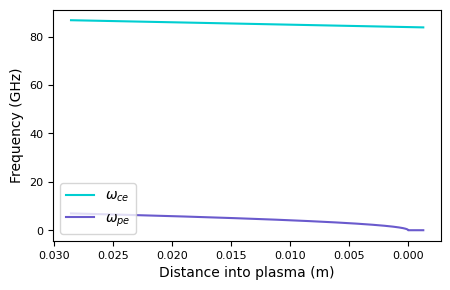

η_0 =  10.0


In [2]:
γnum, γmax = 10, 90/32
γ_   = np.logspace(-2,0,γnum)*γmax
γidx = -1

#saveplots='LINEARcavity_eta10p0.png'

plas = linearPlasma_domain(γ_[γidx],β)
plas.plot_report()

print('η_0 = ',γ_[γidx]*32/9)

<string>:69: RuntimeWarning: invalid value encountered in scalar divide


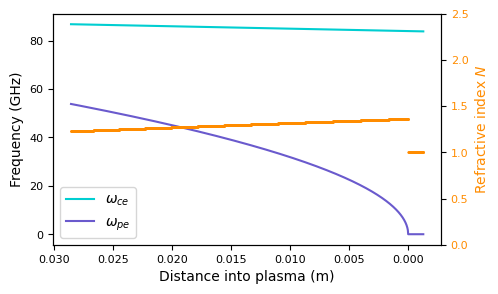

η_0 =  0.16681005372000593


In [3]:
γnum, γmax = 10, 90/32
γ_   = np.logspace(-2,0,γnum)*γmax
γidx = 1

#saveplots='LINEARcavity_cutoff0p0lambda.png'

plas = linearPlasma_domain(γ_[γidx],β)
plas.plot_report(plas.wco_up(0+p0plas))

print('η_0 = ',γ_[γidx]*32/9)

<h2>Initial Study</h2>

In [4]:
xc   = 1250
λinσ = 150

filename = 'xc'+str(xc)+'beta'+str_dclp(β)+'_'+str(λinσ)+'lam_eta_FlightTime.pickle'
# This study can also be done with the kinetic study
#

folderpath = 'Results/linear/xc'+str(xc)+'beta'+str_dclp(β)+'/'


try:
    df=pd.read_pickle(folderpath+filename)
    print('Read '+folderpath+filename)
except: print('Failed to read '+folderpath+filename)
try: df=df.drop(0)
except: pass
df

Read Results/linear/xc1250beta27p9/xc1250beta27p9_150lam_eta_FlightTime.pickle


,λinσ,xc,gamma,eta0,Source,Reflected,Transmitted
1,150,1340,0.028125,0.100000,"[0.0, 1.2480711191553858e-07, 2.49518578277668...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.05...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,150,1340,0.046915,0.166810,"[0.0, 1.1452162755400502e-07, 2.28972441069349...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,150,1340,0.078259,0.278256,"[0.0, 1.0751497294151664e-07, 2.14973365368137...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,150,1340,0.130545,0.464159,"[0.0, 1.0289057734870716e-07, 2.05732862634943...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0587911...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,150,1340,0.217762,0.774264,"[0.0, 9.992278461814622e-08, 1.998021569721519...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,150,1340,0.363248,1.291550,"[0.0, 9.806004874845862e-08, 1.960795786725744...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,150,1340,0.605935,2.154435,"[0.0, 9.690965449830926e-08, 1.937805133612547...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,150,1340,1.010760,3.593814,"[0.0, 9.620696439290564e-08, 1.923761621183776...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,150,1340,1.686049,5.994843,"[0.0, 9.578080146384948e-08, 1.915244516621722...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
10,150,1340,2.812500,10.000000,"[0.0, 9.552350734261551e-08, 1.910102318254805...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


<h4>Info on the wavenumber evolution</h4>

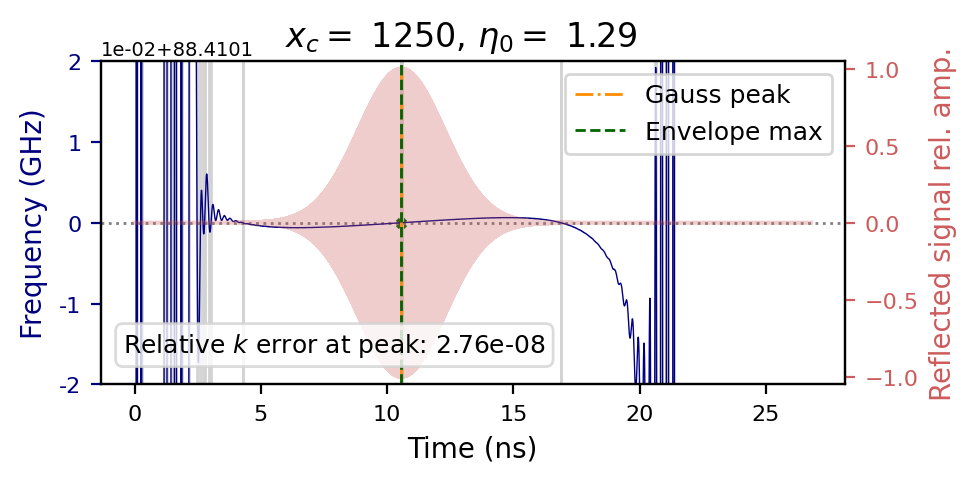

In [5]:
wavenumber_info(df.loc[6],zoomscale=1e-2,GHz=True,seconds=True,savefile=folderpath+'refinfo_exreport')

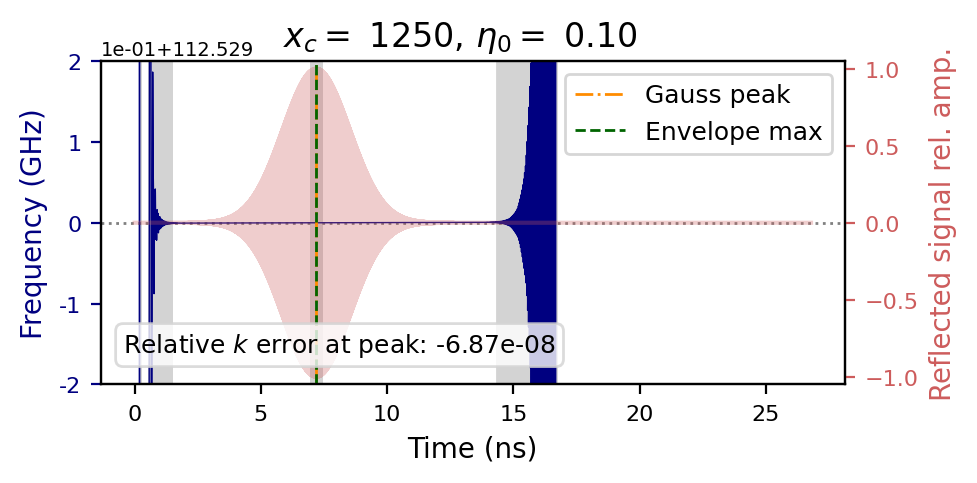

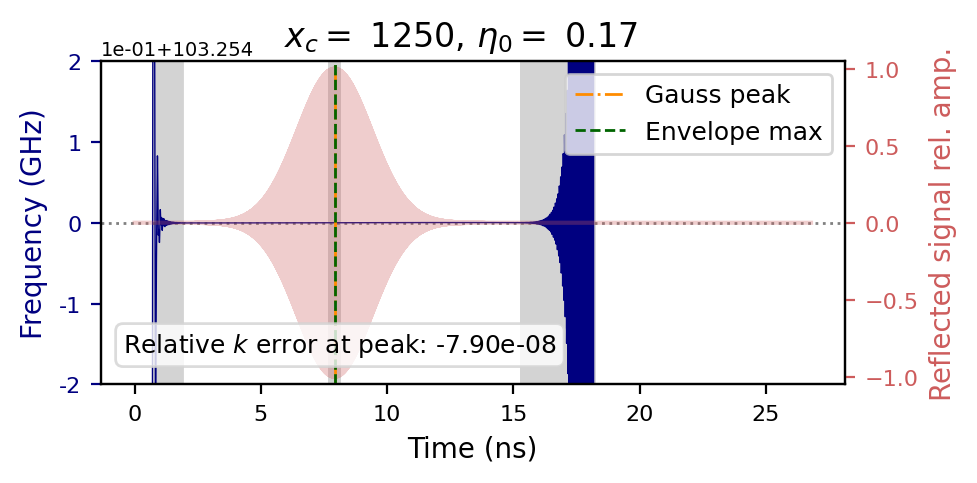

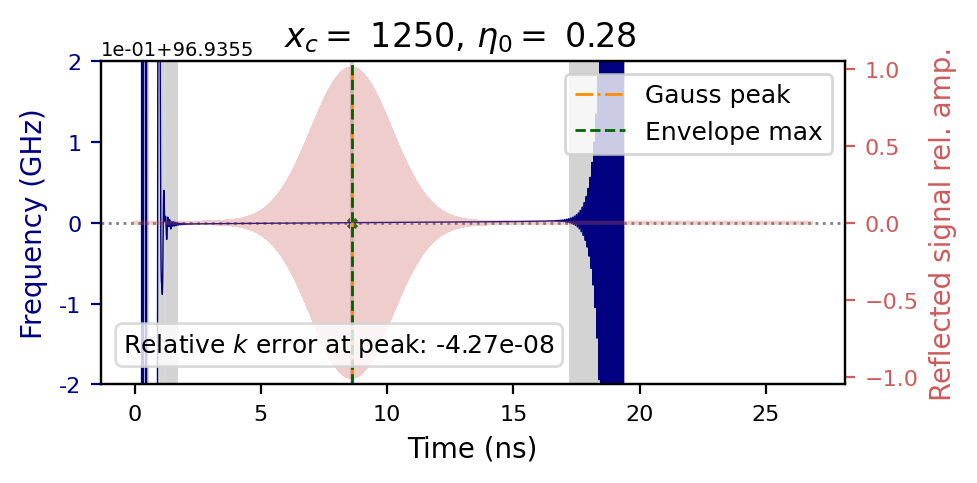

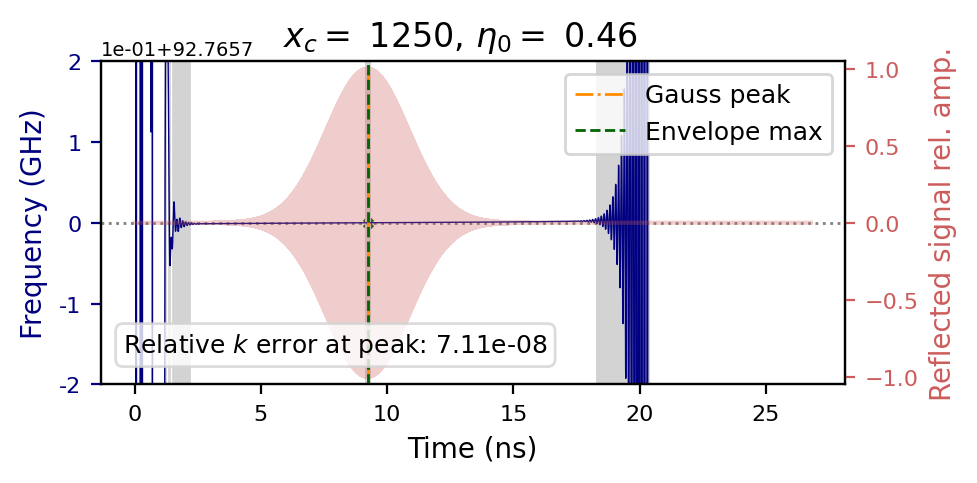

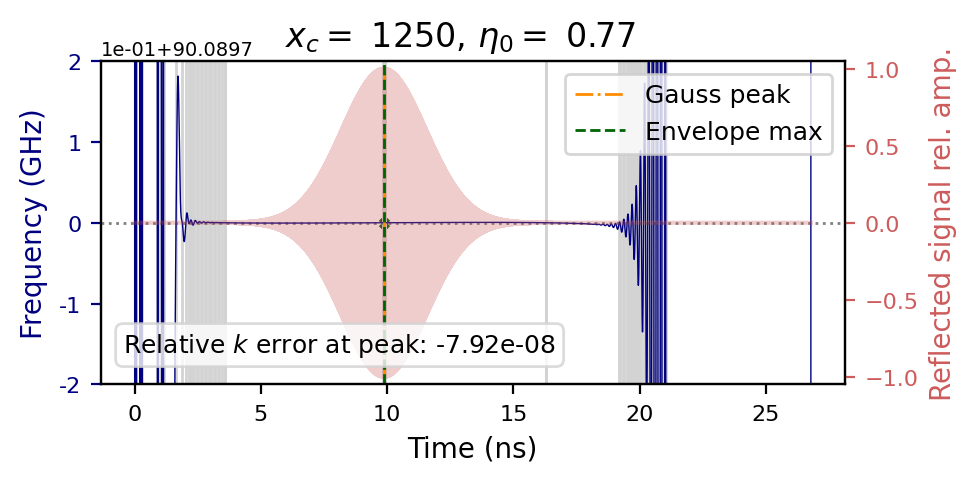

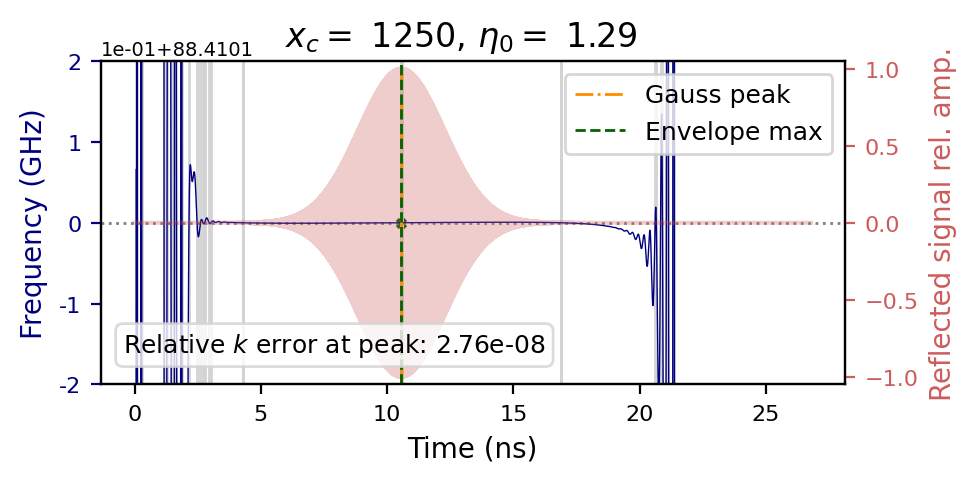

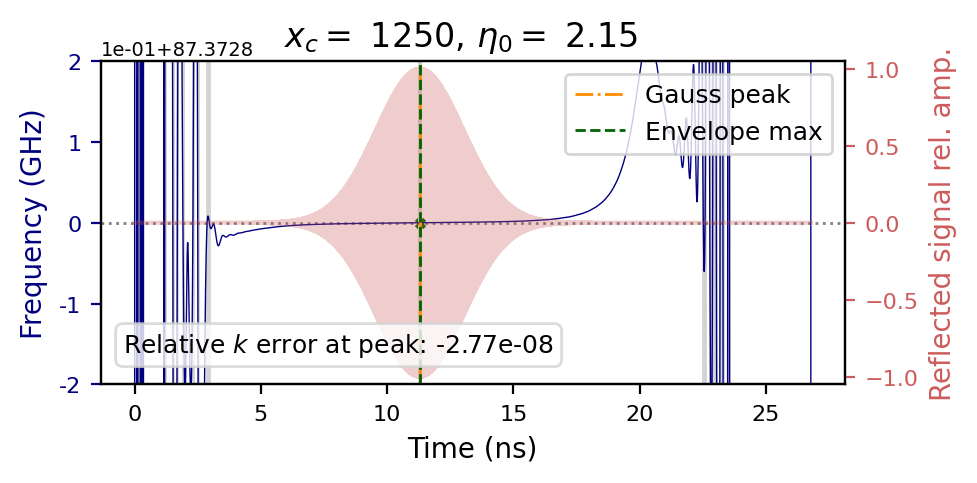

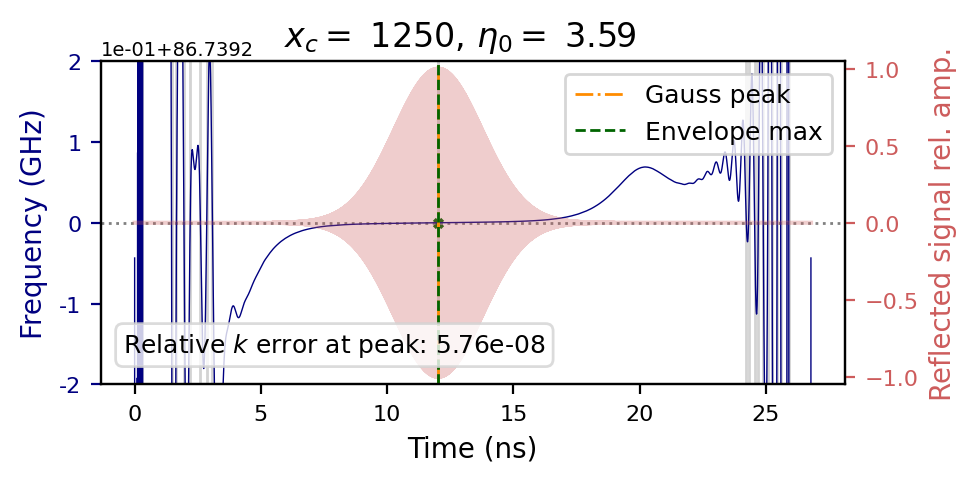

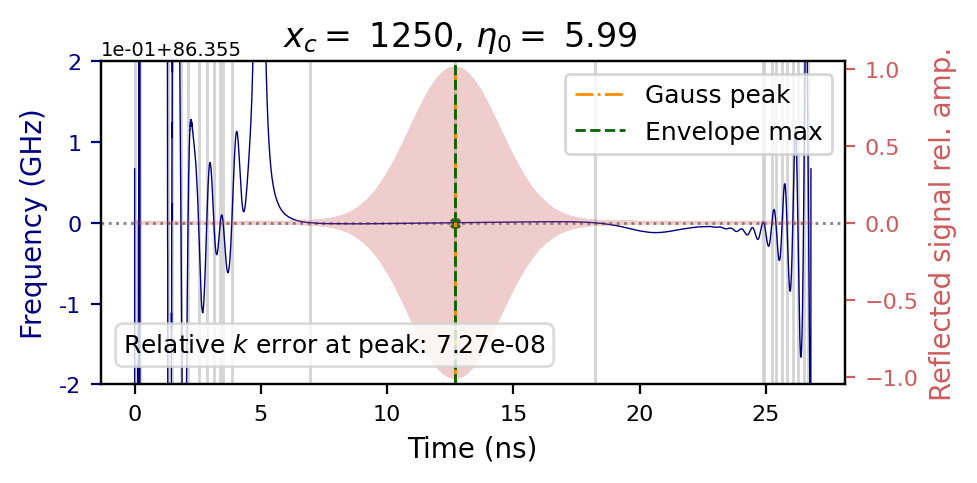

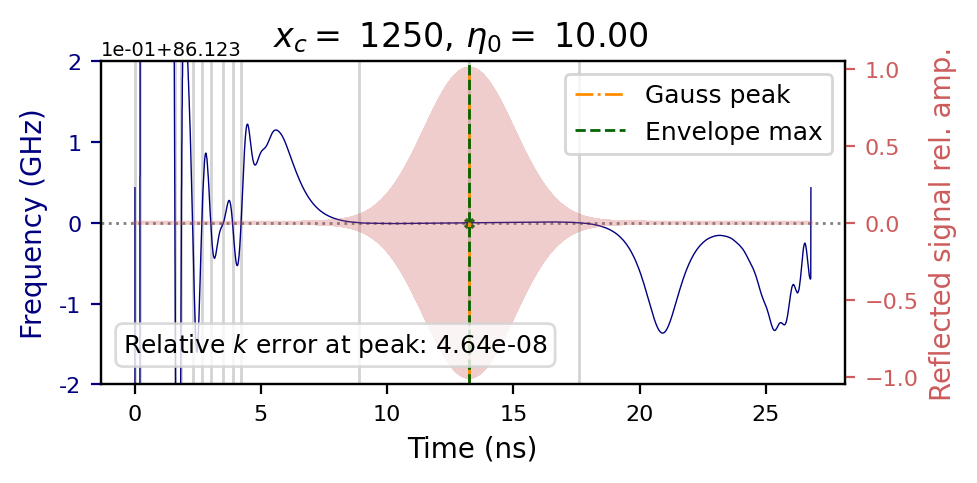

In [6]:
saveplots = 0
scale=1e-1

for i in range(len(df)):
    if saveplots:
        wavenumber_info(df.loc[i+1],zoomscale=scale,GHz=True,seconds=True,
                        savefile=folderpath+'refinfo_xc'+str(df.loc[i+1].at['xc']-p0plas)+'_eta'+str_dclp(df.loc[i+1].at['eta0'],2)+'.png')
    else:
        wavenumber_info(df.loc[i+1],zoomscale=scale,GHz=True,seconds=True)

<h4>Time of flight - Numerical vs theoretical</h4>

In [7]:
def theo_τ0(η):
    return η/(1+η)*(1-np.arcsinh(np.sqrt(1+η))/np.sqrt((2+η)*(1+η)))
#def theo_τ0old(η):
#    return η/(1+η)*(np.sqrt(2+η)/np.sqrt(1+η)-(np.arcsinh(np.sqrt(1+η)))/(1+η))

# -- We write the parameters in terms of xc and η0

def wco_up_linear(x,Ln,LB,wp02=(9/16)*k00**2,wca2=k00**2,p0plas=p0plas):
    return 0.5*(wc_linear(x,wca2,LB,p0plas)+np.sqrt(wc_linear(x,wca2,LB,p0plas)**2+4*wpe2_linear(x,wp02,Ln,p0plas)))
    
def Xc(η,xc,wp02=(9/16)*k00**2,wca2=k00**2,p0plas=p0plas):
    return wpe2_linear(xc,wp02,η*9/32*β*Nx,p0plas)/wco_up_linear(xc,wp02,wca2,η*9/32*β*Nx,β*Nx,p0plas)**2
def A0(η,xc):
    return (1-Xc(η,xc))/(1+η)
def C0(η,xc):
    return np.sqrt((2-2*Xc(η,xc)+η)/(1+η))
def δ(η,xc):
    return Xc(η,xc)/(2-2*Xc(η,xc)+η)

In [8]:
# These two functions are written to work with the index xc, not the selected xc (idx xc = selec xc + p0plas)

def FirstOrder_τ(η,xc):
    return theo_τ0(η)+(xc-p0plas)/(β*Nx)*(1+(η*(5+2*η))/(1+η)**2
                                          +np.arcsinh(np.sqrt(1+η))/np.sqrt((2+η)*(1+η))*(1-η*(7+4*η)/(1+η)**2)
                                         )
def theo_τ(η,xc):
    return 2*np.sqrt(1+δ(η,xc))/np.sqrt(A0(η,xc)+1)*((xc-p0plas)*(np.sqrt(A0(η,xc)+1)+A0(η,xc)*np.arcsinh(1/np.sqrt(A0(η,xc)))
                                                                  +δ(η,xc)/8*((A0(η,xc)+2)*np.sqrt(A0(η,xc)+1)-A0(η,xc)**2*np.arcsinh(1/np.sqrt(A0(η,xc)))))
                                                     +η/(1+η)**2*(β*Nx*(np.sqrt(1+A0(η,xc))/A0(η,xc)-np.arcsinh(1/np.sqrt(A0(η,xc)))
                                                                      -δ(η,xc)/4*((3*A0(η,xc)+2)*np.arcsinh(1/np.sqrt(A0(η,xc)))-3*np.sqrt(A0(η,xc)+1)))
                                                                  +(xc-p0plas)*((3*A0(η,xc)+2)*np.sqrt(A0(η,xc)+1)/A0(η,xc)
                                                                                -(3*A0(η,xc)+4)*np.arcsinh(1/np.sqrt(A0(η,xc)))
                                                                                -δ(η,xc)/8*((15*A0(η,xc)**2+24*A0(η,xc)+8)*np.arcsinh(1/np.sqrt(A0(η,xc)))
                                                                                            -(15*A0(η,xc)+14)*np.sqrt(A0(η,xc)+1))
                                                                               )
                                                                 )
                                                    )

We compute the numerical times of flight. Remark that these also include the time it takes for the emitted wave to reach the plasma and the time since the reflected signal exits the plasma until it reaches the detector. These times are respectively 10 and 12 points, totalling 22. This is a negligible error (0.2% in the worst case) but it is very simple to take into account.

In [9]:
η0_=[df.loc[i+1].at['eta0'] for i in range(len(df))]

τfast_=[]
for i in range(1,len(df)+1):
    try: τfast_.append(time_of_flight(df.loc[i].at['Source'],df.loc[i].at['Reflected'],(True,False),Fast=True))
    except: τfast_.append(0)
τfast_=np.array(τfast_)+22
τfast_

array([11139.3313734 , 13834.3444518 , 18017.29618395, 24082.62060601,
       32706.64945545, 43935.28333733, 57216.75034452, 71276.43551525,
       84554.33701781, 95923.27540736])

We also change the units from points^{-1} to seconds.

In [10]:
Δt_Δx = k00/(2*np.pi*ν) # ns per point

<string>:2: RuntimeWarning: divide by zero encountered in divide
/var/folders/kg/6vcw5219131d1gcdlqf5zhbw0000gn/T/ipykernel_75560/2272595042.py:18: RuntimeWarning: invalid value encountered in divide
  return Xc(η,xc)/(2-2*Xc(η,xc)+η)
/var/folders/kg/6vcw5219131d1gcdlqf5zhbw0000gn/T/ipykernel_75560/170636041.py:8: RuntimeWarning: invalid value encountered in sqrt
  return 2*np.sqrt(1+δ(η,xc))/np.sqrt(A0(η,xc)+1)*((xc-p0plas)*(np.sqrt(A0(η,xc)+1)+A0(η,xc)*np.arcsinh(1/np.sqrt(A0(η,xc)))
/var/folders/kg/6vcw5219131d1gcdlqf5zhbw0000gn/T/ipykernel_75560/170636041.py:9: RuntimeWarning: invalid value encountered in sqrt
  +δ(η,xc)/8*((A0(η,xc)+2)*np.sqrt(A0(η,xc)+1)-A0(η,xc)**2*np.arcsinh(1/np.sqrt(A0(η,xc)))))
/var/folders/kg/6vcw5219131d1gcdlqf5zhbw0000gn/T/ipykernel_75560/170636041.py:10: RuntimeWarning: invalid value encountered in sqrt
  +η/(1+η)**2*(β*Nx*(np.sqrt(1+A0(η,xc))/A0(η,xc)-np.arcsinh(1/np.sqrt(A0(η,xc)))
/var/folders/kg/6vcw5219131d1gcdlqf5zhbw0000gn/T/ipykernel_75560/170636

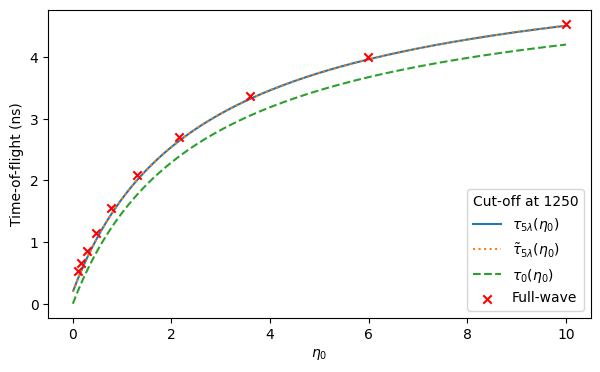

Remember to change $\tau$ subscript!!


In [11]:
saveplots=0

fig,ax=plt.subplots(figsize=(7,4),dpi=100)
#fig,ax=plt.subplots(figsize=(4,2.5),dpi=100)

SIunits = True

if SIunits:                                                                                        # Change subscript
    ax.plot(np.linspace(0,10,1000),theo_τ(np.linspace(0,10,1000),df.loc[1].at['xc'])*Δt_Δx,label='$\\tau_{5\lambda}(\eta_0)$')                 # Change subscript
    ax.plot(np.linspace(0,10,100),FirstOrder_τ(np.linspace(0,10,100),df.loc[1].at['xc'])*(2*β*Nx)*Δt_Δx,linestyle='dotted',label='$\\tilde{\\tau}_{5\lambda}(\eta_0)$')
    ax.plot(np.linspace(0,10,100),theo_τ0(np.linspace(0,10,100))*(2*β*Nx)*Δt_Δx,linestyle='--',label='$\\tau_0(\eta_0)$')
    ax.scatter(η0_[:len(df)],np.array(τfast_)*Δt_Δx,label='Full-wave',c='red',marker='x',zorder=10)
else:                                                                                                 # Change subscript
    ax.plot(np.linspace(0,10,1000),theo_τ(np.linspace(0,10,1000),df.loc[1].at['xc'])/(2*β*Nx),label='$\\tau_{5\lambda}(\eta_0)$',linewidth=1)  # Change subscript
    ax.plot(np.linspace(0,10,100),FirstOrder_τ(np.linspace(0,10,100),df.loc[1].at['xc']),linestyle='dotted',label='$\\tilde{\\tau}_{5\lambda}(\eta_0)$',linewidth=1)
    ax.plot(np.linspace(0,10,100),theo_τ0(np.linspace(0,10,100)),linestyle='--',label='$\\tau_0(\eta_0)$',linewidth=1)
    ax.scatter(η0_[:len(df)],np.array(τfast_)/(2*β*Nx),label='Full-wave',c='red',marker='x',zorder=10)


ax.legend(loc='lower right',title='Cut-off at '+str(df.loc[1].at['xc']-p0plas))
ax.set_xlabel('$\eta_0$')
if SIunits:
    ax.set_ylabel('Time-of-flight (ns)')
else:
    ax.set_ylabel('$τ$ (normalised)')

if saveplots: plt.savefig(folderpath+str(df.loc[1].at['xc']-p0plas)+'plot_report.png',bbox_inches='tight',transparent=True,dpi=500)
#if saveplots: plt.savefig(folderpath+str(df.loc[1].at['xc']-p0plas)+'plot.png',bbox_inches='tight',transparent=True,dpi=500)
#if saveplots: plt.savefig(folderpath+str(df.loc[1].at['xc']-p0plas)+'plot_small.pdf',bbox_inches='tight',transparent=True,dpi=500)
plt.show()

print('Remember to change $\\tau$ subscript!!')


kinetic profiles for eta0 indices 5,7,9 in an interval of 2pi/omega_c time iterations (around 250) for t1 = mu + (2 to 3) sigma and t2 = last t

<h4>Kinetic profile</h4>

In [12]:
Kin2filename = 'xc'+str(xc)+'beta'+str_dclp(β)+'_'+str(λinσ)+'lam_eta_Kinetic2.pickle'

dfk2 = pd.read_pickle(folderpath+Kin2filename)
try: dfk2 = dfk2.drop(0)
except: pass
dfk2

,λinσ,xc,gamma,eta0,Source,Reflected,Transmitted,KineticTime,recordKinetic,KineticSpace
1,150,1340,2.8125,10.0,"[0.0, 9.552350734261551e-08, 1.910102318254805...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[(257388, 247), (565240, 247)]",[[[[ 0.00000000e+00 8.29544028e+00 8.6277789...


velocity units!


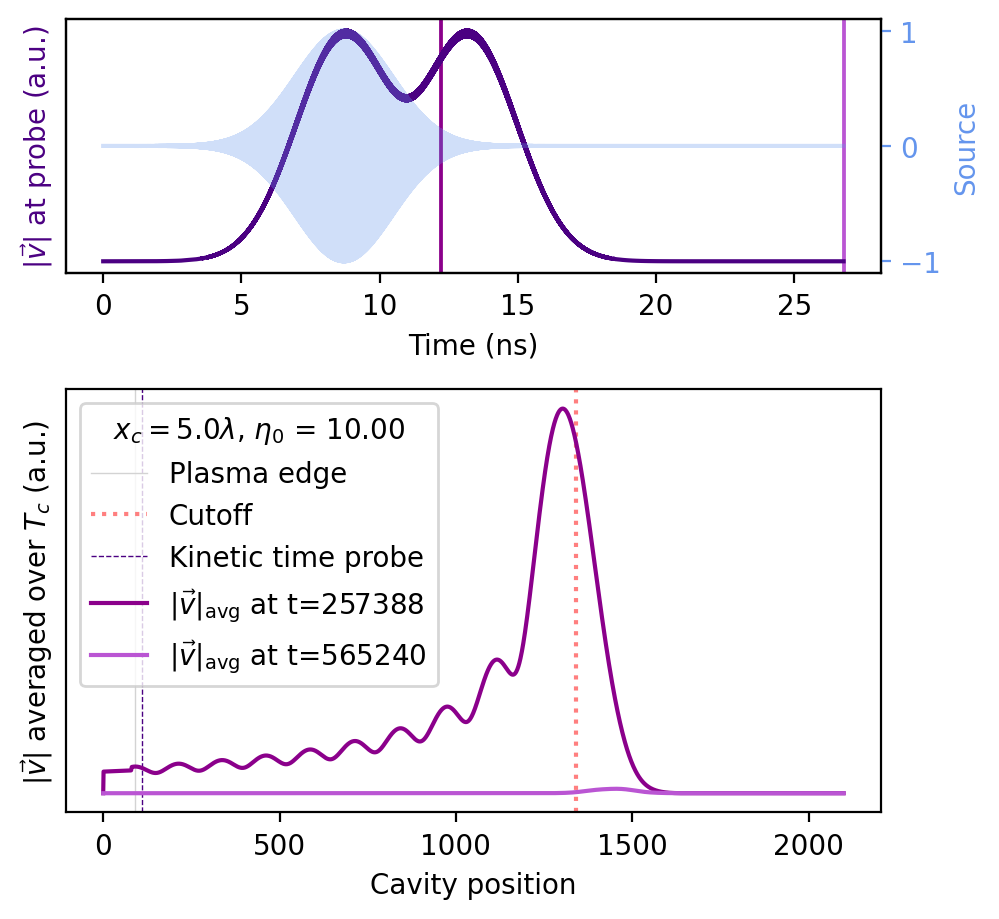

In [13]:
for j in range(len(dfk2)):
    kinetic_info(dfk2.loc[j+1],seconds=True,savefile=folderpath+'kininfo_xc'+str(dfk2.loc[j+1].at['xc']-p0plas)+'_eta'+str_dclp(dfk2.loc[j+1].at['eta0'],2)+'.pdf')

Oscillation period is half of what corresponds to $\omega_c$ due to the double travelling wave (source+reflected)

<h3>(Study of the influence of λinσ)</h3>